In [2]:
#import libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

In [3]:
#import dataset
data=pd.read_csv("D:\\DATA SCIENCE\\ASSIGNMENTS\\Random Forest\\Fraud_check.csv")
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [5]:
#Understanding the dataset
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [6]:
#checking of null values and data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [8]:
data[data.duplicated(keep = False)]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


In [9]:
#converting numerical variable for categorical data
label_encoder = preprocessing.LabelEncoder()
data['Undergrad']= label_encoder.fit_transform(data['Undergrad']) 
data['Marital.Status']= label_encoder.fit_transform(data['Marital.Status']) 
data['Urban']= label_encoder.fit_transform(data['Urban']) 

In [10]:
#We will take high taxable.income above 30000 beacause it is the average of Taxable.income
data["Taxable.Income"]=(data["Taxable.Income"]>30000)*1

In [11]:
x=data.drop(axis=0,columns="Taxable.Income")
y=data["Taxable.Income"]

In [12]:
data["Taxable.Income"].value_counts()

1    476
0    124
Name: Taxable.Income, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [15]:
model = RandomForestClassifier(n_estimators=110, max_features=3)

In [16]:
model.fit(x_train,y_train)

RandomForestClassifier(max_features=3, n_estimators=110)

In [17]:
from sklearn import metrics

In [18]:
Y_pred=model.predict(x_train)

In [19]:
print("accuracy:",metrics.accuracy_score(y_train,Y_pred))

accuracy: 1.0


In [20]:
model.score(x_train, y_train)

1.0

In [21]:
y_pred=model.predict(x_test)

In [22]:
print("accuracy:",metrics.accuracy_score(y_test,y_pred))

accuracy: 0.7222222222222222


In [23]:
model.score(x_test, y_test)

0.7222222222222222

In [24]:
feature_imp = pd.Series(model.feature_importances_,index=x.columns).sort_values(ascending=False)
feature_imp

City.Population    0.527618
Work.Experience    0.281129
Marital.Status     0.081939
Urban              0.060207
Undergrad          0.049106
dtype: float64

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

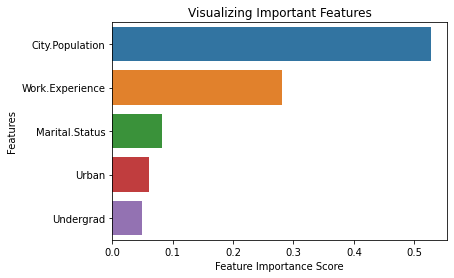

In [26]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [27]:
train_accuracy = []
test_accuracy = []
for max_features in range(1,5):
    model=RandomForestClassifier(n_estimators=110, max_features=3)
    model.fit(x_train, y_train)
    train_accuracy.append(model.score(x_train, y_train))
    test_accuracy.append(model.score(x_test, y_test))

In [28]:
data = pd.DataFrame({'max_features':range(1,5),'train_acc':train_accuracy, 'test_acc':test_accuracy})
data

,max_features,train_acc,test_acc
0,1,1.0,0.716667
1,2,1.0,0.716667
2,3,1.0,0.705556
3,4,1.0,0.711111


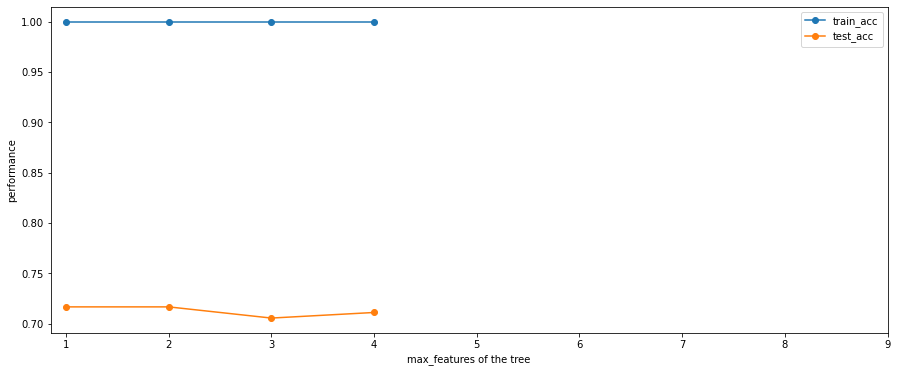

In [29]:
# visulizing accuracy graph to look over max_depth
labels =['train_acc','test_acc']
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot()
plt.plot(data['max_features'],data['train_acc'], marker = 'o')
plt.plot(data['max_features'], data['test_acc'], marker = 'o')
ax.set_xticks(np.arange(1,10))
plt.legend(labels)
plt.xlabel('max_features of the tree')
plt.ylabel('performance')
plt.show()

In [30]:
from sklearn.metrics import confusion_matrix, classification_report
cm= confusion_matrix(y_test, y_pred) 
cm

array([[  2,  38],
       [ 12, 128]], dtype=int64)

In [31]:
# Predicting the values of test data
y_pred = model.predict(x_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.07      0.03      0.04        40
           1       0.77      0.91      0.83       140

    accuracy                           0.71       180
   macro avg       0.42      0.47      0.43       180
weighted avg       0.61      0.71      0.65       180



In [32]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [33]:
from sklearn.model_selection import KFold

In [35]:
kfold=KFold(n_splits=8,random_state=None)

In [36]:
result=cross_val_score(model,x,y,cv=kfold)
print(result.mean())

0.7366666666666667


In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

In [39]:
num_trees = 10
seed=None
kfold = KFold(n_splits=10, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.7916666666666666


In [40]:
model.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=10)

In [41]:
from sklearn import metrics

In [42]:
Y_pred=model.predict(x_train)

In [43]:
print("accuracy:",metrics.accuracy_score(y_train,Y_pred))

accuracy: 0.7976190476190477


In [47]:
model.score(x_train, y_train)

0.7976190476190477

In [48]:
y_pred=model.predict(x_test)

In [50]:
print("accuracy:",metrics.accuracy_score(y_test,y_pred))

accuracy: 0.7777777777777778
